In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data = pd.read_csv(r"C:\Users\User\Downloads\netflix1.csv")

In [9]:
data.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [4]:
data.shape

(8790, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
columns = list(data)
columns

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [12]:
(data[columns[1:11]] == 0).sum()

type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

DATA CLEANING PROCESS:

FIND THE NULL VALUE IN THE DATA SET:

In [13]:
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


FIND DUPLICATE VALUES IN THE DS AND IF ANY DROP IT:


In [14]:
data.drop_duplicates(inplace=True)

NOW DROP THOSE ROWS WHICH ARE HAVING CRITICAL MISSING VALUES:

In [15]:
data.dropna(subset=['director','country'],inplace=True)


CONVERT "DATA_ADDED" TO DATETIME

In [16]:
data['date_added'] = pd.to_datetime(data['date_added'])

In [17]:
print(data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


Clen string Columns(Remove spaces)

In [18]:
for col in ['type', 'title', 'director', 'country', 'rating', 'duration', 'listed_in']:
    data[col] = data[col].str.strip()

Extract Duration number and unit

In [19]:
data[['duration_num', 'duration_unit']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_num'] = data['duration_num'].astype(float)


In [20]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2.0,Seasons
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,3.0,Seasons
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",1.0,Season
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,1.0,Season


EDA(EXPLORE DATA DISTRIBUTION)(MOVIE VS TV SHOW COUNT)

In [21]:
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [22]:
type_counts = data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


PLOTING THE DIATRIBUTION IN GRAPH

C:\Users\User\AppData\Local\Temp\ipykernel_12940\1924976366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')


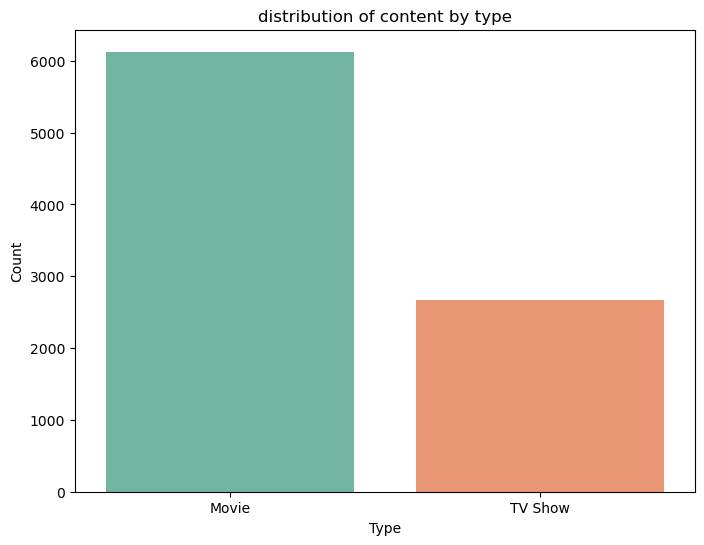

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')
plt.title("distribution of content by type")
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

SPLIT THE LISTED_IN COLUMN AND COUNT GENRES

In [24]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'],[])
genre_counts = pd.Series(all_genres).value_counts().head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_12940\3945731312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values,


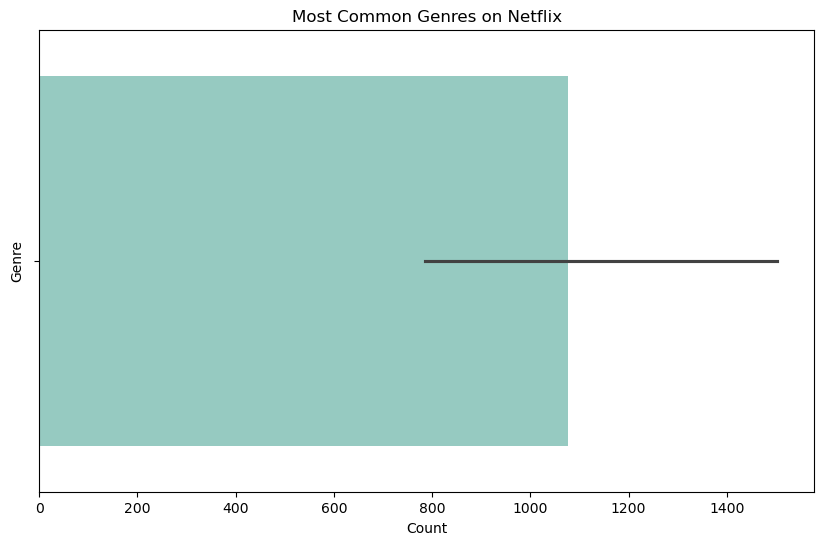

In [25]:
# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,
palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

EXTRACT YEAR AND MONTH FROM 'data_added'

In [26]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month


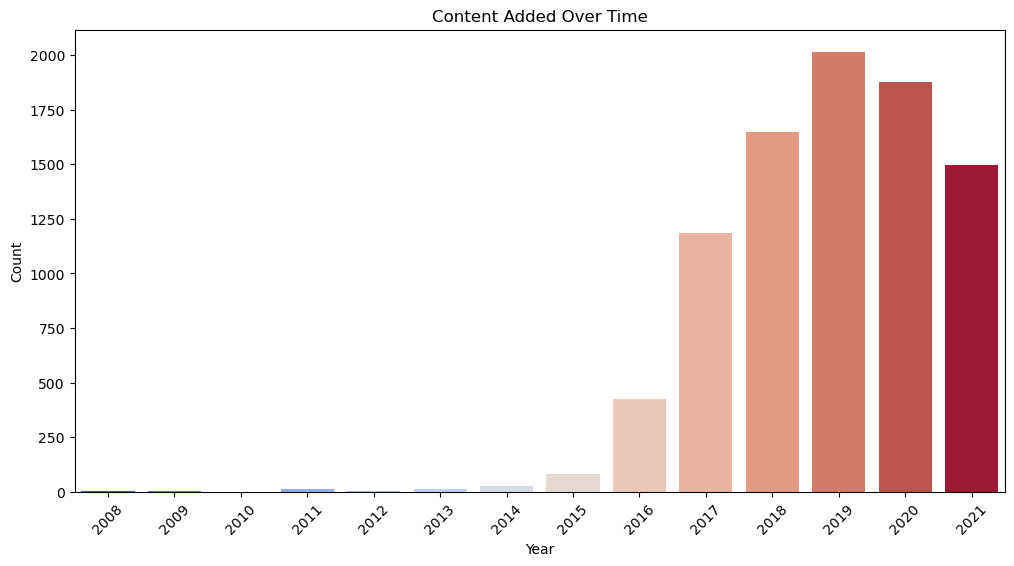

In [27]:

#plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(
    x='year_added',
    data=data,
    hue='year_added',     # add hue to satisfy the palette requirement
    palette='coolwarm',
    legend=False          # hides redundant legend
)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Top 10 Directors with the Most Titles

In [28]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)

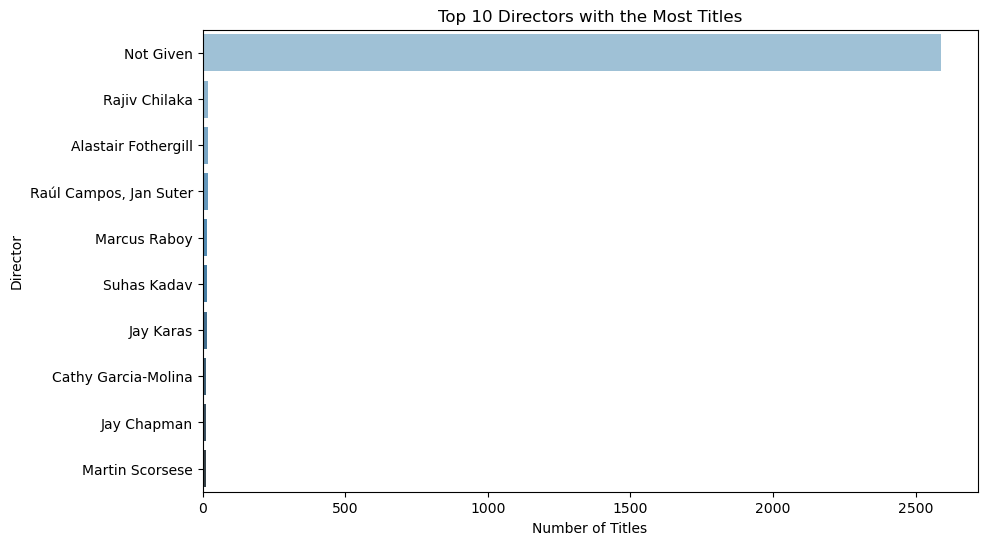

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    hue=top_directors.index,      # add hue to use palette correctly
    palette='Blues_d',
    legend=False                  # remove extra legend
)

plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


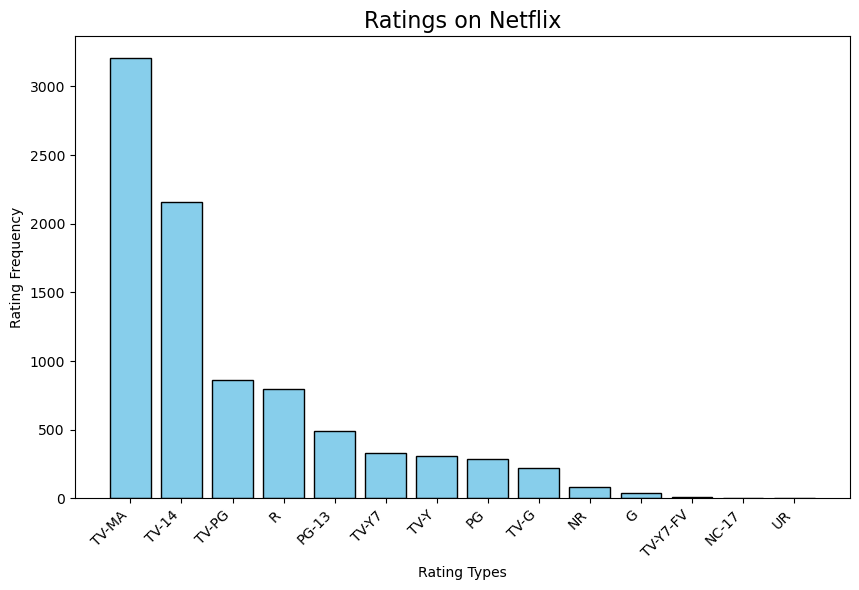

In [30]:
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']
ratings = ratings.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(ratings['rating'], ratings['count'], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title('Ratings on Netflix', fontsize=16)
plt.show()


In [31]:
print(data.isnull().sum())
print(data.loc[data['date_added'].isna(), ['title','date_added']])
print(data.loc[data['duration_num'].isna(), ['title','duration']].head(20))

show_id          0
type             0
title            0
director         0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
duration_num     0
duration_unit    0
genres           0
year_added       0
month_added      0
dtype: int64
Empty DataFrame
Columns: [title, date_added]
Index: []
Empty DataFrame
Columns: [title, duration]
Index: []


CHECK HOW MANY ROWS I REMOVED

In [32]:
orignal = pd.read_csv(r"C:\Users\User\Downloads\netflix1.csv").shape[0]
cleaned = data.shape[0]
print("removed rows:", orignal - cleaned, "Remaining:",cleaned)

removed rows: 0 Remaining: 8790


Inspect unusual values (outliers)

In [33]:
data['duration_num'].describe()
data.loc[data['duration_num']>500,['title','duration']] #likely bad rows

,title,duration


UNIQUE COUNTS FOR MULTI VALUE COLUMNS

In [34]:
print("unique genres (approx):",len(set(sum(data['genres'],[]))))
print("unique directors",data['director'].nunique())

unique genres (approx): 73
unique directors 4528


Word Cloud of Movie Titles

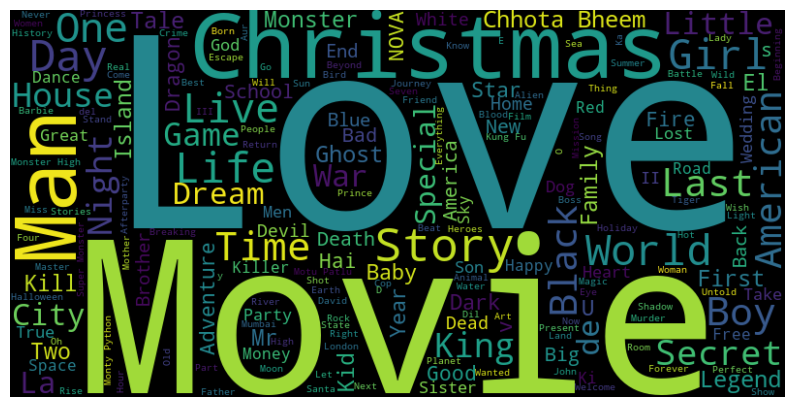

In [35]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud=WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


###Feature Engineering And MetaData Fixes(importent next)

NORMALISE DIRECTOR

In [36]:
data['director_norm'] = data['director'].str.lower().str.lower().str.replace(r'\s+',' ', regex=True)
# if multiple direction per row, keep first(or explode later)
data['first_director'] = data['director_norm'].str.split(',').str[0]
# Many versions of same name break counts

In [37]:
data['first_director']

0       kirsten johnson
1       julien leclercq
2         mike flanagan
3         bruno garotti
4          haile gerima
             ...       
8785          not given
8786          not given
8787          not given
8788          not given
8789          not given
Name: first_director, Length: 8790, dtype: object

In [38]:
data['director_norm']

0       kirsten johnson
1       julien leclercq
2         mike flanagan
3         bruno garotti
4          haile gerima
             ...       
8785          not given
8786          not given
8787          not given
8788          not given
8789          not given
Name: director_norm, Length: 8790, dtype: object

EXPLODE MULTI VALUE FIELD (CAREFUL: WILL INCREASE ROWS)

In [39]:
df_genre = data.assign(genre=data['genres']).explode('genre')
df_genre['genre'] = df_genre['genre'].str.strip().str.title()
#Enables accurate genre-level aggregation.


CREATE BINARY / AGGREATED Features

In [40]:
data['is_movie'] = (data['type']=='Movie').astype(int)
data['num_genres'] = data['genres'].apply(len)
data['title_word_count'] = data['title'].str.split().str.len()
data['is_recent_added'] = (data['date_added'] >= '2019-01-01').astype(int)
#Useful for clustering, modeling, or quick filters

Season/quarter features

In [41]:
data['quarter_added'] = data['date_added'].dt.to_period('Q').astype(str)
data['month_name'] = data['date_added'].dt.month_name()
# Useful for seasonality analysis

DEEPER ANALYSES AND VISUALIZATIONS (PRODUCE INSIGHTS)

Top Level KPIs(card for dashboard)

In [42]:
total_titles = len(data)
movies = data['is_movie'].sum()
tvshows = total_titles - movies
unique_directors = data['first_director'].nunique()
unique_genres = len(set(sum(data['genres'], [])))
print(total_titles, movies, tvshows, unique_directors, unique_genres)
# Stakeholders like single-number summaries

8790 6126 2664 4401 73


Growth / seasonality analysis (time series decomposition)

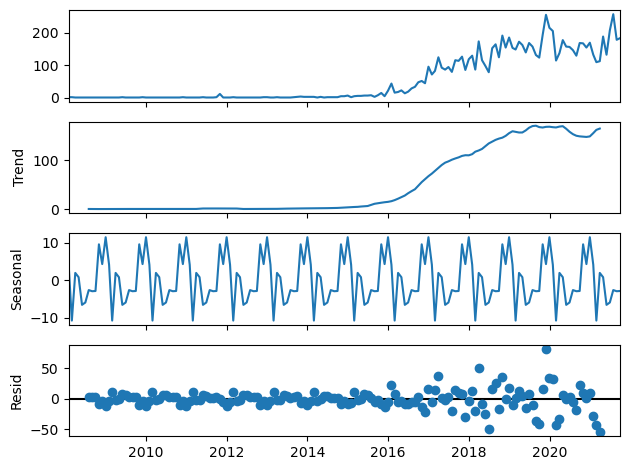

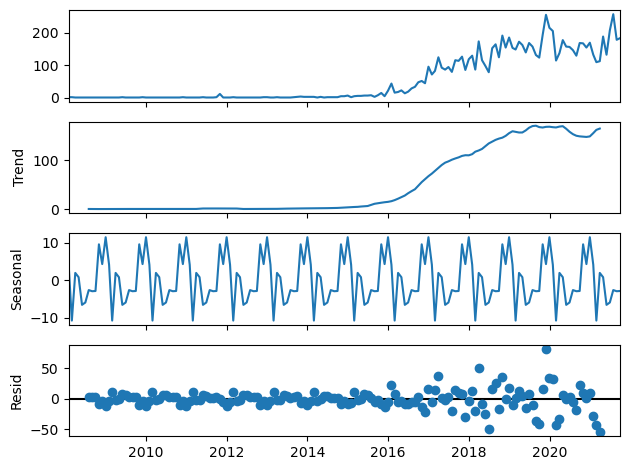

In [43]:
ts = data.set_index('date_added').resample('ME').size()
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(ts, model='additive', period=12)
res.plot()
# Discover annual cycles


Genre co-occurrence / association rules

In [44]:
from collections import Counter
pairs = Counter()
for g in data['genres']:
    genres = [x.strip() for x in g]
    for i in range(len(genres)):
        for j in range(i+1, len(genres)):
            pairs[tuple(sorted([genres[i], genres[j]]))] += 1
pairs.most_common(10)
# Helps content strategists see common pairings (e.g., Drama + Romance)

[(('Dramas', 'International Movies'), 1483),
 (('Comedies', 'International Movies'), 804),
 (('Dramas', 'Independent Movies'), 588),
 (('International TV Shows', 'TV Dramas'), 514),
 (('Comedies', 'Dramas'), 502),
 (('Action & Adventure', 'International Movies'), 398),
 (('International Movies', 'Romantic Movies'), 372),
 (('International TV Shows', 'Romantic TV Shows'), 315),
 (('Dramas', 'Romantic Movies'), 308),
 (('Crime TV Shows', 'International TV Shows'), 299)]

Director productivity vs genre (Which directors make which genres)

<Axes: xlabel='genre', ylabel='first_director'>

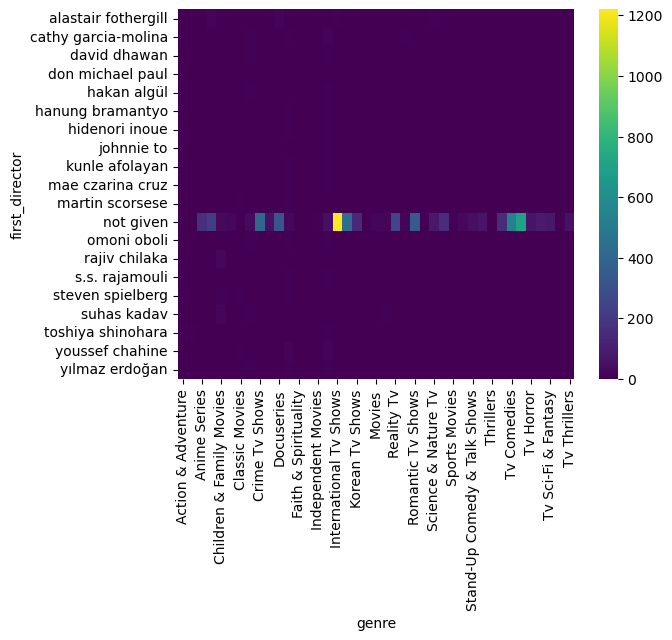

In [45]:
df_dir_genre = df_genre.groupby(['first_director','genre']).size().reset_index(name='count')
top_dir = df_dir_genre.groupby('first_director')['count'].sum().nlargest(20).index
df_top_dir_genre = df_dir_genre[df_dir_genre['first_director'].isin(top_dir)]
# pivot and heatmap
pivot = df_top_dir_genre.pivot(index='first_director', columns='genre', values='count').fillna(0)
sns.heatmap(pivot, cmap='viridis')

# Shows director specialization


WordClouds for titles or descriptions

In [46]:
text = " ".join(data['title'].dropna().astype(str).tolist())
WordCloud(width=800, height=400).generate(text)
# Quick qualitative sense of themes

Top N per country over time
E.g., top producing countries each year:

In [47]:
df_country = data.assign(country=data['country'].str.split(',')).explode('country')
df_country['country'] = df_country['country'].str.strip()
top_by_year = df_country.groupby(['year_added','country']).size().reset_index(name='count')
# for year 2020
top_by_year[top_by_year['year_added']==2020].sort_values('count', ascending=False).head(10)
 # See geographic strategy shifts.

,year_added,country,count
298,2020,United States,719
258,2020,India,197
297,2020,United Kingdom,106
264,2020,Japan,68
244,2020,Canada,64
252,2020,France,53
250,2020,Egypt,53
277,2020,Pakistan,50
289,2020,South Korea,48
276,2020,Not Given,41


Modeling & recommender systems  
: Content-based recommender (text + metadata) — practical, no user data

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data['desc_for_rec'] = (
    data['title'].fillna('') + ' ' +
    data['listed_in'].fillna('')
)

tf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf = tf.fit_transform(data['desc_for_rec'])

# Recommender function
def recommend(title, topn=5):
    idx = data.index[data['title'].str.lower() == title.lower()]
    if len(idx) == 0:
        return []
    idx = idx[0]
    sims = cosine_similarity(tfidf[idx], tfidf).flatten()
    sims[idx] = 0  # remove self-similarity
    top_idx = sims.argsort()[::-1][:topn]
    return data.loc[top_idx, ['title', 'listed_in', 'release_year']]

# Example
recommend('House of Cards', topn=5)



,title,listed_in,release_year
7119,Ojos in d' House,"International TV Shows, TV Comedies",2013
4093,The Land of Cards,"Dramas, Independent Movies, International Movies",2012
6435,Viceroy's House,Dramas,2017
8721,The House That Made Me,"International TV Shows, Reality TV",2015
7688,WHAT / IF,"TV Dramas, TV Thrillers",2019


SIMPLE CLASSIFICATION (PREDICTIVE MOVIE AS TV SHOW)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

features = pd.DataFrame({
    'duration_num': data['duration_num'].fillna(0),
    'num_genres': data['num_genres'],
    'title_len': data['title_word_count'],
})
X_train, X_test, y_train, y_test = train_test_split(features, data['is_movie'], test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       520
           1       1.00      1.00      1.00      1238

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [44]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,...,month_added,director_norm,first_director,is_movie,num_genres,title_word_count,is_recent_added,quarter_added,month_name,desc_for_rec
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,...,9,kirsten johnson,kirsten johnson,1,1,4,1,2021Q3,September,Dick Johnson Is Dead Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",...,9,julien leclercq,julien leclercq,0,3,1,1,2021Q3,September,"Ganglands Crime TV Shows, International TV Sho..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",...,9,mike flanagan,mike flanagan,0,3,2,1,2021Q3,September,"Midnight Mass TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",...,9,bruno garotti,bruno garotti,1,2,5,1,2021Q3,September,Confessions of an Invisible Girl Children & Fa...
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",...,9,haile gerima,haile gerima,1,3,1,1,2021Q3,September,"Sankofa Dramas, Independent Movies, Internatio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",...,1,not given,not given,0,2,2,0,2017Q1,January,"Yunus Emre International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,...,9,not given,not given,0,1,2,0,2018Q3,September,Zak Storm Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",...,12,not given,not given,0,3,3,0,2016Q4,December,"Zindagi Gulzar Hai International TV Shows, Rom..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,...,6,not given,not given,0,1,1,0,2018Q2,June,Yoko Kids' TV


In [49]:
# Step E: Export the cleaned dataset

# Save cleaned data to a new CSV file
data.to_csv(r"C:\Users\User\Downloads\netflix_clean.csv", index=False)

print("✅ Cleaned data has been saved successfully!")


✅ Cleaned data has been saved successfully!
